In [39]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import colors

In [2]:
import numpy as np

In [1]:
plt.rc('image', interpolation="nearest", cmap='coolwarm')
plt.rc('font', family='STIXGeneral')

NameError: name 'mpl' is not defined

In [4]:
from isanaht import plot_helper as ph
ph.set_plot_defaults_1()

In [5]:
ext = [0,1,0,1]

---

# Problem 1

In [6]:
pi = np.pi

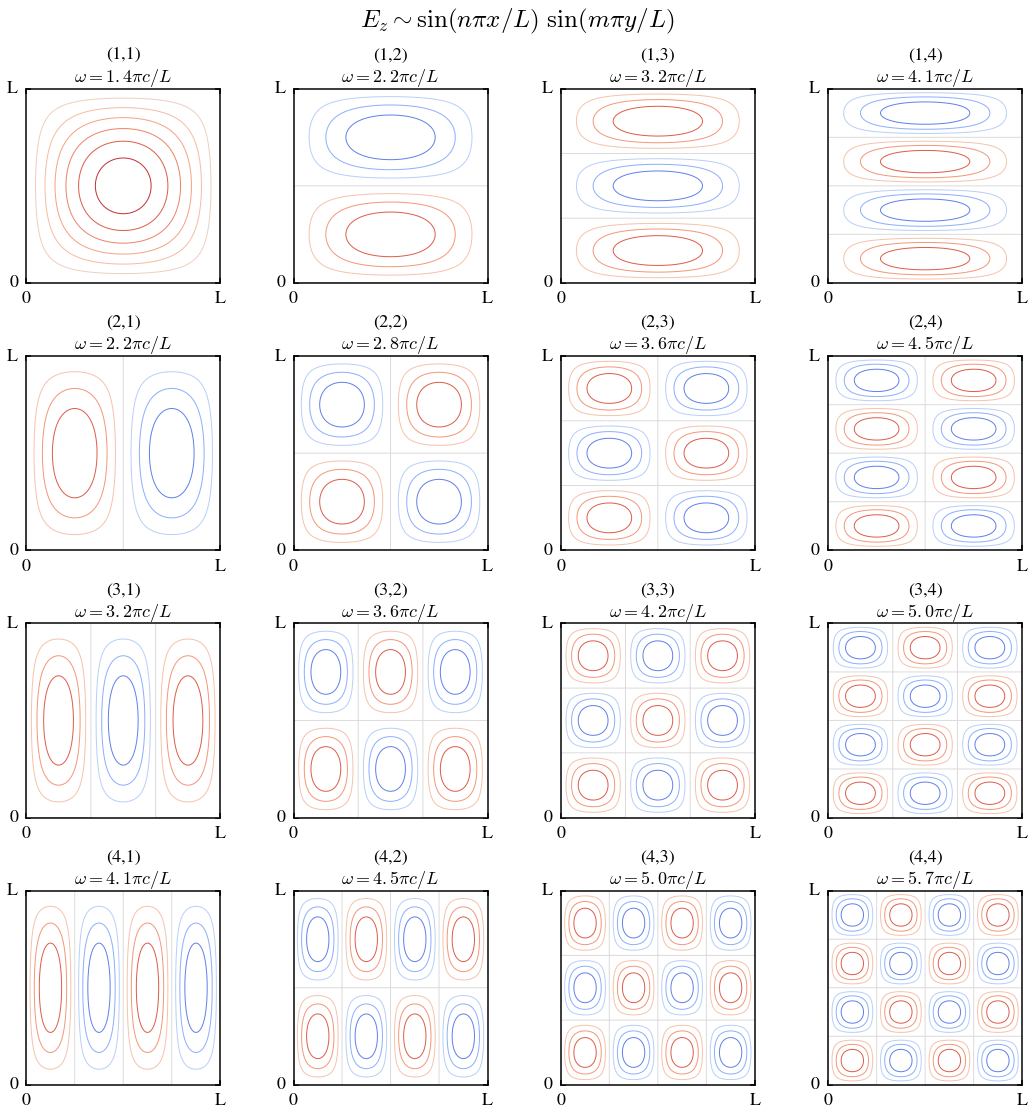

In [46]:
y,x = np.mgrid[0:1:500j, 0:1:500j]

fontsize=18

N = np.arange(1,5)
M = np.arange(1,5)

SH = (N.shape[0], M.shape[0])

# fig, ax = plt.subplots(1,1, figsize=(5,5))
# im = ax.imshow(np.sin(pi*x) * np.sin(pi*y), extent=[0,1,0,1], aspect=1, vmin=-1, vmax=1)
# plt.colorbar(im)

fig,ax = plt.subplots(*SH, figsize=(60/N.max(), 60/M.max()))

solutions = dict()

for i,n in enumerate(N):
    for j,m in enumerate(M):
        ax[i,j].set_aspect('equal')
        im = np.sin(n*pi*x) * np.sin(m*pi*y)
        
        solutions[(n,m)] = im
        
#         ax[i,j].imshow(im, extent=[0,1,0,1], aspect=1, vmin=-1, vmax=1)
        ax[i,j].contour(im, extent=[0,1,0,1], aspect=1, vmin=-1 ,vmax=1)
        
        ax[i,j].set_title("({},{})\n$\omega = {:2.1f}\pi c/ L$".format(n,m, np.sqrt(n**2 + m**2)), fontsize=fontsize)

        ax[i,j].set_xticks([0,1])
        ax[i,j].set_yticks([0,1])
        ax[i,j].set_xticklabels(['0', 'L'], fontsize=fontsize)
        ax[i,j].set_yticklabels(['0', 'L'], fontsize=fontsize)


        
#         ph.fmt_ax(ax[i,j])
        ax[i,j].grid(False)
        
#         if i<2:
#             ax[i,j].set_xticklabels('')
#         else:
        
#         if j>0:
#             ax[i,j].set_yticklabels('')
#         else:

fig.suptitle("$E_z \sim \sin(n\pi x/L)\ \sin(m \pi y/L)$", y=1.03, fontsize=25)
fig.tight_layout()
fig.savefig("./PSet2/Soln.pdf", bbox_inches='tight', facecolor='none')

Using these contour plots of the solutions $(n,m),$ I can evaluate which solutions are partners of different irreps. Note that because the solutions for $E_z \sim \sin(n \pi x / L)\sin(m\pi x/L),$ the solution for $n=0$ or $m=0$ is a trivial solution with zero field everywhere. As such, the $(0,0)$ solution is a partner of irrep $D^{(1)}$ since it transforms identically. Similarly, by inspection, the solution $(1,1)$ is a partner of irrep $D^{(1)}$ since it is even under all transformations.


|Irrep | Partners |
|------|----------|
|$D^{(1)}$ | (n,0), (0,m), (1,1), (1,3) + (3,1), (3,3) |
|$D^{(2)}$ | (2,4) - (4,2) |
|$D^{(3)}$ | (2,2), (1,3)-(3,1) |
|$D^{(4)}$ | (2,4) + (4,2), (4,4) |
|$D^{(5)}$ | (1,2), (2,1), (1,4), (4,1),(2,3), (3,2), (3,4), (4,3) |






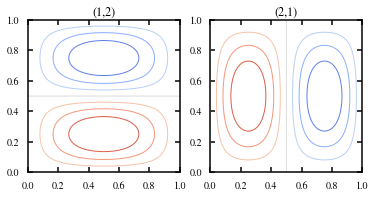

In [30]:
s12 = solutions[(1,2)]
s21 = solutions[(2,1)]

ax = plt.subplot(121)
ax.set_title("(1,2)");
ax.set_aspect('equal');
plt.contour(s12, aspect=1, extent=ext, vmin=-1, vmax=1);

ax = plt.subplot(122)
ax.set_title("(2,1)");
ax.set_aspect('equal');
plt.contour(s21, aspect=1, extent=ext, vmin=-1, vmax=1);

looking at the degenerate solution pairs (2,1) and (1,2), I can test to see which irreps these project onto:

$P^{(5)} E_{12} = \frac{2}{8} (2 E_{12} - 2 \hat{O}_{C_2} E_{12}) = \frac{1}{2} ( E_{12} -  (-E_{12}) = E_{12}$

similarly for the solution (2,1), so these solutions are partners of irrep $D^{(5)}.$

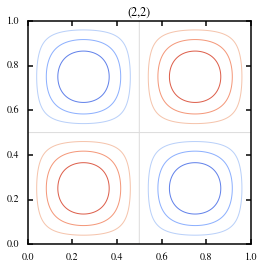

In [29]:
s22 = solutions[(2,2)]

ax = plt.subplot(111)
ax.set_title("(2,2)");
ax.set_aspect('equal');
plt.contour(s22, aspect=1, extent=ext, vmin=-1, vmax=1);

The next solution to evaluate is (2,2). This solution is even under $\sigma'$, odd under $\sigma$, odd under $C_4$ and even under $C_2$. Hence, the solution (2,2) should be a partner of irrep $D^{(3)}$.

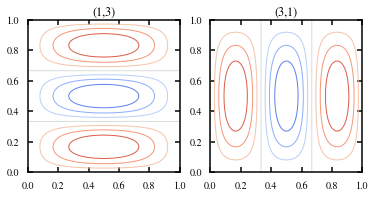

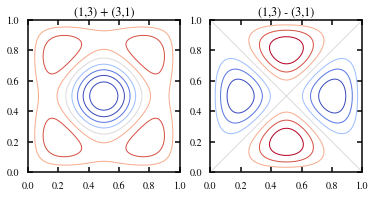

In [37]:
s13 = solutions[(1,3)]
s31 = solutions[(3,1)]

ax = plt.subplot(121)
ax.set_title("(1,3)");
ax.set_aspect('equal');
plt.contour(s13, aspect=1, extent=ext, vmin=-1, vmax=1);

ax = plt.subplot(122)
ax.set_title("(3,1)");
ax.set_aspect('equal');
plt.contour(s31, aspect=1, extent=ext, vmin=-1, vmax=1);

plt.figure()
ax = plt.subplot(121)
ax.set_title("(1,3) + (3,1)");
ax.set_aspect('equal');
plt.contour(s13 + s31, aspect=1, extent=ext, vmin=-1, vmax=1);

ax = plt.subplot(122)
ax.set_title("(1,3) - (3,1)");
ax.set_aspect('equal');
plt.contour(s13 - s31, aspect=1, extent=ext, vmin=-1, vmax=1);

Comparing these two solutions to the different irreps reveals that they are _not_ partners of any single irrep but are in fact reducible. To understand the rudicibility, I consider the equivalent solutions (same $\omega$) (1,3) + (3,1) and (1,3)-(3,1). 

This transformation reveals that (1,3) + (3,1) is a partner of irrep $D^{(1)}$ while (1,3)-(3,1) is a partner of irrep $D^{(3)}.$ Hence (1,3) and (3,1) can be decomposed into parts that are each partners of irreps $D^{(1)}$ and $D^{(3)}.$

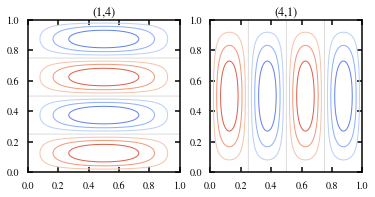

In [44]:
s14 = solutions[(1,4)]
s41 = solutions[(4,1)]

ax = plt.subplot(121)
ax.set_title("(1,4)");
ax.set_aspect('equal');
plt.contour(s14, aspect=1, extent=ext, vmin=-1, vmax=1);

ax = plt.subplot(122)
ax.set_title("(4,1)");
ax.set_aspect('equal');
plt.contour(s41, aspect=1, extent=ext, vmin=-1, vmax=1);

Since these degenerate solutions are odd under $C_2,$ they are partners of $D^{(5)}.$

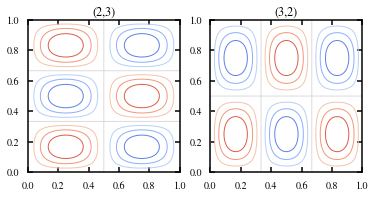

In [32]:
s23 = solutions[(2,3)]
s32 = solutions[(3,2)]

ax = plt.subplot(121)
ax.set_title("(2,3)");
ax.set_aspect('equal');
plt.contour(s23, aspect=1, extent=ext, vmin=-1, vmax=1);

ax = plt.subplot(122)
ax.set_title("(3,2)");
ax.set_aspect('equal');
plt.contour(s32, aspect=1, extent=ext, vmin=-1, vmax=1);

Inspecting these solutions, it is clear that (2,3) and (3,2) are partner functions of $D^{(5)}.$

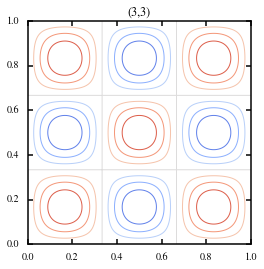

In [39]:
s33 = solutions[(3,3)]

ax = plt.subplot(111)
ax.set_title("(3,3)");
ax.set_aspect('equal');
plt.contour(s33, aspect=1, extent=ext, vmin=-1, vmax=1);

By inspection, the solution (3,3) is a partner of irrep $D^{(1)}.$

By inspection, the solutions (1,4) and (4,1) are partners of irrep $D^{(5)}$

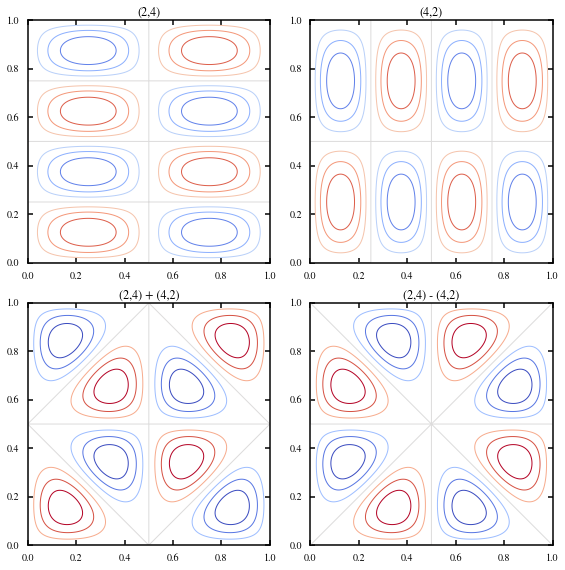

In [48]:
s24 = solutions[(2,4)]
s42 = solutions[(4,2)]

fig = plt.figure(figsize=(8,8))

ax = plt.subplot(221)
ax.set_title("(2,4)");
ax.set_aspect('equal');
plt.contour(s24, aspect=1, extent=ext, vmin=-1, vmax=1);

ax = plt.subplot(222)
ax.set_title("(4,2)");
ax.set_aspect('equal');
plt.contour(s42, aspect=1, extent=ext, vmin=-1, vmax=1);

ax = plt.subplot(223)
ax.set_title("(2,4) + (4,2)");
ax.set_aspect('equal');
plt.contour(s24 + s42, aspect=1, extent=ext, vmin=-1, vmax=1);

ax = plt.subplot(224)
ax.set_title("(2,4) - (4,2)");
ax.set_aspect('equal');
plt.contour(s24 - s42, aspect=1, extent=ext, vmin=-1, vmax=1);

fig.tight_layout()
fig.savefig("./PSet2/Soln24-42.pdf", bbox_inches='tight', facecolor='none')

By inspection, the solutions (2,4) and (4,2) are not partners of a single irrep, but they can be decomposed.
As with (1,3) and (3,1), consider (2,4) $\pm$ (4,2). 

(2,4) + (4,2) is even under $\sigma'$, odd under $\sigma$, even under $C_2$ and odd under $C_4$, making it a partner of $D^{(4)}.$

(2,4) - (4,2) is odd under both $\sigma$ and $\sigma'$ and even under both $C_2$ and $C_2$. Hence this solution is a partner of $D^{(2)}.$

These relations can be verified by projecting either (2,4) or (4,2) onto $D^{(2)}$ and $D^{(4)}.$

Consider the projections 

\begin{align}
P^{(2)} E_{24} & = \frac{1}{8} ( E_{24} - \hat{O}_{\sigma_1}E_{24} - \hat{O}_{\sigma_2}E_{24} - \hat{O}_{\sigma_1'}E_{24} - \hat{O}_{\sigma_2'}E_{24} + \hat{O}_{C_4}E_{24} + \hat{O}_{C_4^{-1}}E_{24} + \hat{O}_{C_4}E_{24}) \\
& = \frac{1}{8} (E_{24} - (-E_{24}) - (-E_{24}) - (E_{42}) - (E_{42}) + (-E_{42}) + (-E_{42}) + (E_{24})) \\ 
& = \frac{1}{2} (E_{24} - E_{42})
\end{align}

\begin{align}
P^{(4)} E_{24} & = \frac{1}{8} ( E_{24} - \hat{O}_{\sigma_1}E_{24} - \hat{O}_{\sigma_2}E_{24} + \hat{O}_{\sigma_1'}E_{24} + \hat{O}_{\sigma_2'}E_{24} - \hat{O}_{C_4}E_{24} - \hat{O}_{C_4^{-1}}E_{24} + \hat{O}_{C_4}E_{24}) \\
& = \frac{1}{8} (E_{24} - (-E_{24}) - (-E_{24}) + (E_{42}) + (E_{42}) - (-E_{42}) - (-E_{42}) + (E_{24})) \\ 
& = \frac{1}{2} (E_{24} + E_{42})
\end{align}

Since $P^{(2)} E_{24} + P^{(4)} E_{24} = E_{24},$ $E_{24}$ cannot be partners with any other irrep.

Sim for $E_{42}.$

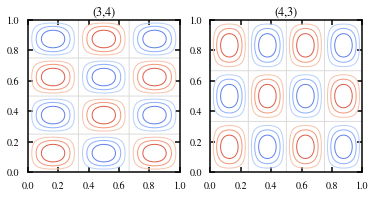

In [42]:
s34 = solutions[(3,4)]
s43 = solutions[(4,3)]

ax = plt.subplot(121)
ax.set_title("(3,4)");
ax.set_aspect('equal');
plt.contour(s34, aspect=1, extent=ext, vmin=-1, vmax=1);

ax = plt.subplot(122)
ax.set_title("(4,3)");
ax.set_aspect('equal');
plt.contour(s43, aspect=1, extent=ext, vmin=-1, vmax=1);

Since they're both odd under $C_2,$ solutions (3,4) and (4,3) are partners of $D^{(5)}.$

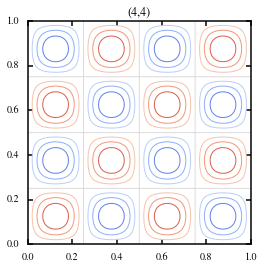

In [43]:
s44 = solutions[(4,4)]

ax = plt.subplot(111)
ax.set_title("(4,4)");
ax.set_aspect('equal');
plt.contour(s44, aspect=1, extent=ext, vmin=-1, vmax=1);

This solution is odd under $2\sigma$ and even under $2\sigma',$ odd under $C_4$ and even under $C_2.$ Hence (4,4) is a partner of $D^{(4)}.$

---

# Problem 4

(0, 3)

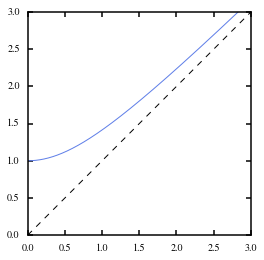

In [57]:
xx = np.mgrid[0:5:1000j]
fig,ax=plt.subplots(1,1)

ax.set_aspect('equal')
ax.plot(xx,xx, 'k--')
ax.plot(xx, np.sqrt(1+xx**2),c=plt.cm.coolwarm(30))
ax.set_ylim(0,3)
ax.set_xlim(0,3)
